# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


## - <span style="color:blue"> First:</span>  the c++ codes are in the folder exercise_02 (remember to read the file READ_ME first)
## - <span style="color:blue"> Second:</span> run the following cells in order to do the data analysis

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$

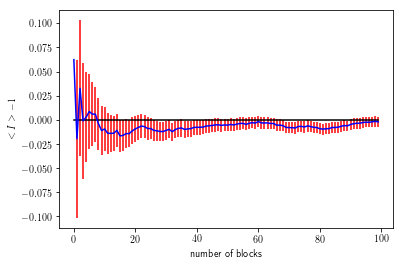

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['text.usetex'] = True

M=10000
N=100
L=int(M/N)
x = np.arange(N)
#x*=L
y = np.zeros(N)
sum_prog,err_prog = np.loadtxt("data_uniform_I.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
plt.ylabel(r"$<I>-1$")
#plt.xlabel("throwns")
plt.xlabel("number of blocks")
plt.plot(x,y,color='black')

plt.show()

2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

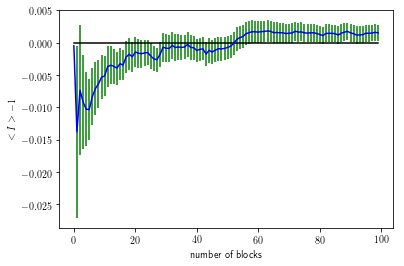

In [11]:
sum_prog,err_prog = np.loadtxt("data_importance_I.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='g')
plt.ylabel(r"$<I>-1$")
#plt.xlabel("throwns")
plt.xlabel("number of blocks")
plt.plot(x,y,color='black')

plt.show()


### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$

optimized parameters k = [1.01160853]
parameters uncertainty = [0.00118778]


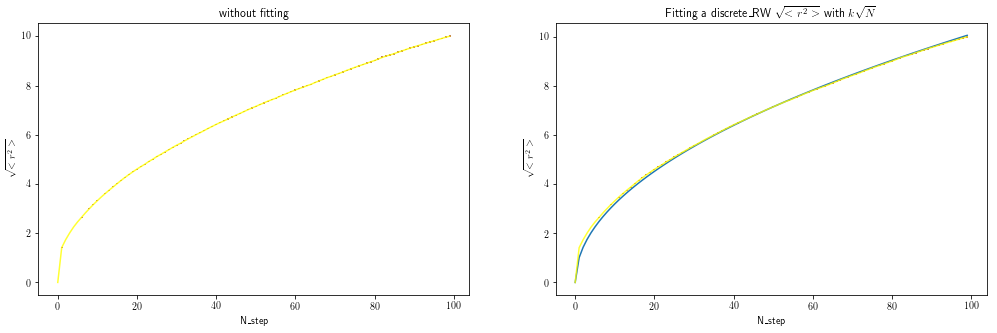

In [15]:
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x=np.arange(N)
sum_prog,err_prog = np.loadtxt("data_RW_discr.txt",usecols=(0,1), delimiter=' ', unpack='true')

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(17, 5))
### without fitting ##############################
axs[0].errorbar(x,sum_prog,yerr=err_prog,color='yellow',ecolor='darkred',alpha=0.8)
axs[0].set_ylabel(r"$\sqrt{<r^2>}$")
axs[0].set_xlabel("N\_step")
axs[0].set_title(r'without fitting')
#### fitting with K*sqrt(x) ######################
axs[1].errorbar(x,sum_prog,yerr=err_prog,color='yellow',ecolor='darkred',alpha=0.8)
axs[1].set_ylabel(r"$\sqrt{<r^2>}$")
axs[1].set_xlabel("N\_step")
axs[1].set_title(r'Fitting a discrete\_RW' + ' $\sqrt{<r^2>}$ with $ k \sqrt{N}$')
p_opt, p_cov = curve_fit(f, x, sum_prog)
y_fit = f(x,p_opt[0])
axs[1].plot(x,y_fit) # plotting fitted function
print("optimized parameters k =" + f" {p_opt}")
print("parameters uncertainty ="f" {np.sqrt(np.diagonal(p_cov))}")

plt.show()

2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

optimized parameters k = [1.00471899]
parameters uncertainty = [0.00123124]


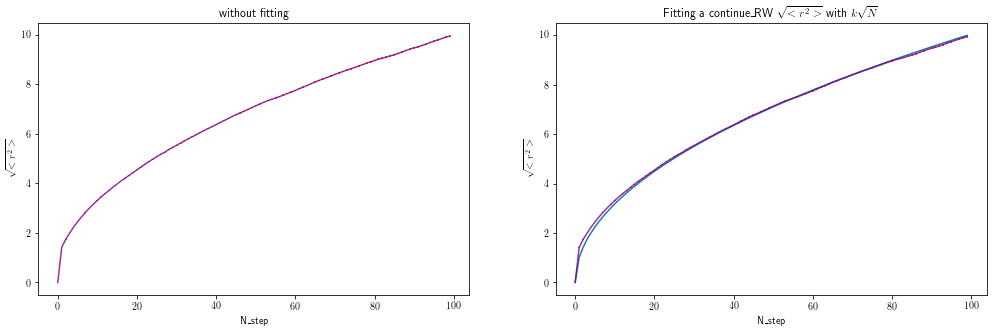

In [14]:
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x=np.arange(N)
sum_prog,err_prog = np.loadtxt("data_RW_cont.txt",usecols=(0,1), delimiter=' ', unpack='true')

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(17, 5))
### without fitting ##############################
axs[0].errorbar(x,sum_prog,yerr=err_prog,color='purple',ecolor='red',alpha=0.8)
axs[0].set_ylabel(r"$\sqrt{<r^2>}$")
axs[0].set_xlabel("N\_step")
axs[0].set_title(r'without fitting')
#### fitting with K*sqrt(x) ######################
axs[1].errorbar(x,sum_prog,yerr=err_prog,color='purple',ecolor='red',alpha=0.8)
axs[1].set_ylabel(r"$\sqrt{<r^2>}$")
axs[1].set_xlabel("N\_step")
axs[1].set_title(r'Fitting a continue\_RW' + ' $\sqrt{<r^2>}$ with $ k \sqrt{N}$')
p_opt, p_cov = curve_fit(f, x, sum_prog)
y_fit = f(x,p_opt[0])
axs[1].plot(x,y_fit) # plotting fitted function
print("optimized parameters k =" + f" {p_opt}")
print("parameters uncertainty ="f" {np.sqrt(np.diagonal(p_cov))}")

plt.show()

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

- yes they do. they are RW walk processes with equal probability for stepforward or step backward. So we can find that the probability density to find our RW in a point x at time t follows the diffusion equation: 
- $\frac{\partial p(x,t)}{\partial t} = D \frac{\partial^2 p(x,t)}{\partial x^2}$ 
- if our initial condition is $\delta (x)$ at time t=0 we can find $ p(x,t) = \frac{1}{\sqrt{4 \pi D t}} \exp{\frac{-x^2}{4 D t}} $
- we already know it because of the CLT, and if we try to find $<x^2>$ we find that it is equal to $\sigma^2=N a$ with $N$ the number of step
- note: this is true for all of the three dimension. The movement along one direction is not correleted to the others  